# Sea Level Predictor

Created by Darío López Díaz. Work in progress..

The idea of this project is to analyze the global average sea level since 1880, and predict the sea level growth at 2050. The behaviour of the sea level has been approximately linear between 1880 and 2013, for this reason we consider a linear least-squares regression. In order to analize future sea level values we made an adjustment in the last decade due to an explosive growth in this period.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

The data source is provided by the US Environmental Protection Agency: 
Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.&nbsp;https://datahub.io/core/sea-level-rise

In [2]:
df = pd.read_csv('epa-sea-level.csv')

We perform a linear least-squares regression from the SciPy package available in: https://docs.scipy.org/doc/scipy/index.html#  

In [3]:
Lin_Reg = linregress(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])

With this linear function, we are able to predict the sea level behaviour. To see if it is correct we can check the fit in to the data plotting the data and the linear regression. We use the statistical data visualization package Seaborn. 

Text(0, 0.5, 'Sea Level (inches)')

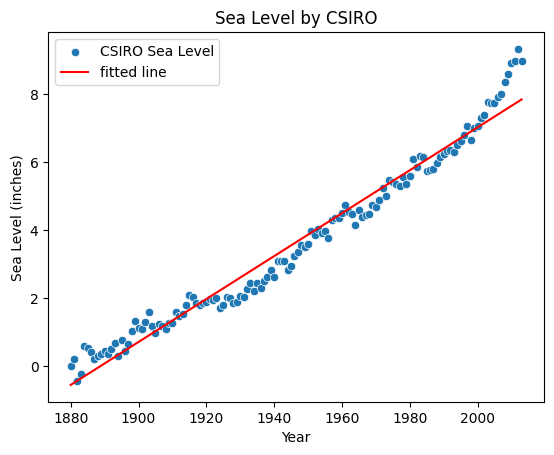

In [4]:
y2=Lin_Reg.intercept + Lin_Reg.slope * df['Year']
sns.scatterplot(x='Year',y='CSIRO Adjusted Sea Level',data=df,label='CSIRO Sea Level')
sns.lineplot(x='Year',y= y2,data=df,color='r',label='fitted line')
plt.title('Sea Level by CSIRO')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')

We see that the fit of the linear function is correct, but the data suffer an important growth in the last decade. For this reason we consider values above the year 2000 and we compute again the linear regression for this data.    


In [5]:
df_last = df[df['Year']>=2000]

In [6]:
Lin_Reg_Last = linregress(x=df_last['Year'], y=df_last['CSIRO Adjusted Sea Level'])
print(Lin_Reg_Last)

LinregressResult(slope=0.1664272733318682, intercept=-325.7934668059649, rvalue=0.9762875716140618, pvalue=2.4388064141618245e-09, stderr=0.010652933111541163, intercept_stderr=21.375153425608215)


Now we plot the new linear regression together with the data of the last decade until 2050, in this way we can approximately predict the value of the sea level at this years.     

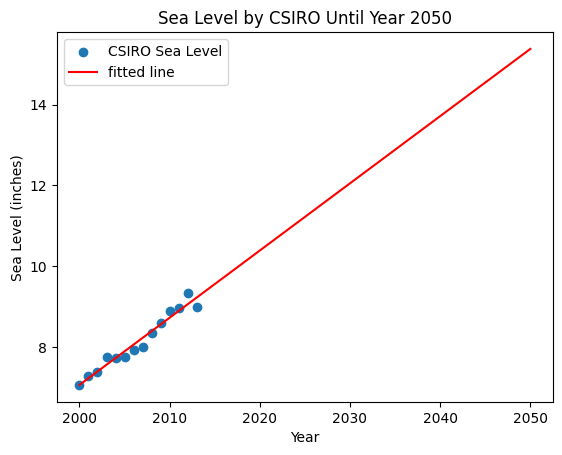

In [7]:
x1= df_last['Year']
y1=df_last['CSIRO Adjusted Sea Level']
x2=np.arange(2000,2051)
y2=Lin_Reg_Last.intercept + Lin_Reg_Last.slope*x2
plt.scatter(x1, y1, label='CSIRO Sea Level')
plt.plot(x2, y2, label='fitted line',color='r')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Sea Level by CSIRO Until Year 2050')
plt.legend()
plt.show()

In [8]:
val_2050 = Lin_Reg_Last.intercept + Lin_Reg_Last.slope*2050
print(val_2050)

15.382443524364874


We spect in 2050  that the sea level will be 15.38 inches above the normalized value (Year=1880)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d0f76c86-2670-46db-9170-34fc10601ca6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>